### ini cuman buat enable GPU, kalo kalian belum install cuda gabisa kayanya

In [26]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [27]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


### library

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models, optimizers

### Load dataset dan baca nama label kelas

In [35]:
train_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/train"
val_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/val"

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=32, image_size=(224,224))
validation_dataset = tf.keras.utils.image_dataset_from_directory(val_dir, shuffle=True, batch_size=32, image_size=(224,224))


class_names = train_dataset.class_names
print(class_names)


Found 8008 files belonging to 13 classes.
Found 2285 files belonging to 13 classes.
['cable_machine', 'calfraise_machine', 'chestfly_machine', 'elliptical_trainer', 'hacksquat_machine', 'hyperextension_bench', 'latpulldown_machine', 'legcurl_machine', 'legpress_machine', 'rotarycalf_machine', 'rowing_machine', 'shoulder_press', 'smith_machine']


In [ ]:
# test_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test"
# test_data = tf.keras.utils.image_dataset_from_directory(val_dir, shuffle=True, batch_size=32, image_size=(224,224))

In [10]:
# num_classes = 6  # Ganti dengan jumlah kelas Anda

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(80, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(120, (3, 3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(200, (3, 3), padding='valid', activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(num_classes, activation='softmax'))  # Menggunakan jumlah neuron sesuai dengan jumlah kelas

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',  # Loss function untuk klasifikasi multi-kelas
#               metrics=['accuracy'])

# model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 80)        46160     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 80)      

### Ini kode sebelumnya yang aku encoding label kelas nya jadi angka 
### Gausa dipake karna repot waktu predictnya

In [15]:
# import tensorflow as tf
# from sklearn.preprocessing import LabelEncoder

# IMG_SIZE = (224, 224)
# IMG_SHAPE = IMG_SIZE + (3,)

# # Inisialisasi LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder ke label
# label_encoder.fit(class_names)

# # Fungsi untuk mengonversi label string menjadi bilangan bulat
# def encode_labels(x, y):
#     return x, y

# # Terapkan fungsi encode_labels pada train_dataset dan validation_dataset
# train_dataset_encoded = train_dataset.map(encode_labels)
# validation_dataset_encoded = validation_dataset.map(encode_labels)

# # Load the pre-trained MobileNetV2 model
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
# base_model.trainable = False

# # Add custom top layers
# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./127.5, offset=-1, input_shape=IMG_SHAPE),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(len(class_names), activation='softmax')  # Menggunakan jumlah kelas yang sesuai
# ])

# # Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#               loss='sparse_categorical_crossentropy',  # Menggunakan sparse_categorical_crossentropy untuk bilangan bulat
#               metrics=['accuracy'])

# # Print the model summary
# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,340,358
Trainable params: 82,374
Non-tra

### Ini kode yang benar buat training 

In [36]:
import tensorflow as tf

IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet') 
base_model.trainable = False
#include_top=False di kode ini buat matiin layer ouput dari mobilenetnya karna kita ga butuh
#fyi setauku mobilenet punya 1000 label yang udah di train, jadi kita matiin ituu biar modelnya pake label kita sendiri(6 label)

# Add custom top layers ---- nah ini ngeganti layer yang dimatiin itu pake layer kita sendiri
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./127.5, offset=-1, input_shape=IMG_SHAPE),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Menggunakan jumlah kelas yang sesuai
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Menggunakan sparse_categorical_crossentropy untuk bilangan bulat
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 64)                81984     
                                                                 
 dense_17 (Dense)            (None, 13)                845       
                                                                 
Total params: 2,340,813
Trainable params: 82,829
Non-t

In [37]:
# Train the model
hist = model.fit(train_dataset, epochs=50, validation_data=validation_dataset)

Epoch 1/50
251/251 [==============================] - 40s 130ms/step - loss: 1.7957 - accuracy: 0.4617 - val_loss: 1.1817 - val_accuracy: 0.6753
Epoch 2/50
251/251 [==============================] - 26s 104ms/step - loss: 0.8917 - accuracy: 0.7579 - val_loss: 0.7507 - val_accuracy: 0.7934
Epoch 3/50
251/251 [==============================] - 26s 103ms/step - loss: 0.6006 - accuracy: 0.8392 - val_loss: 0.5701 - val_accuracy: 0.8416
Epoch 4/50
251/251 [==============================] - 29s 114ms/step - loss: 0.4506 - accuracy: 0.8867 - val_loss: 0.4554 - val_accuracy: 0.8775
Epoch 5/50
251/251 [==============================] - 26s 103ms/step - loss: 0.3548 - accuracy: 0.9182 - val_loss: 0.3790 - val_accuracy: 0.9020
Epoch 6/50
251/251 [==============================] - 27s 108ms/step - loss: 0.2884 - accuracy: 0.9381 - val_loss: 0.3214 - val_accuracy: 0.9234
Epoch 7/50
251/251 [==============================] - 25s 100ms/step - loss: 0.2384 - accuracy: 0.9550 - val_loss: 0.2808 - val_ac

In [7]:
# import os
# import tensorflow as tf

# def is_tensorflow_image_valid(image_path):
#     try:
#         image = tf.io.read_file(image_path)
#         image = tf.image.decode_image(image)
#         return True
#     except Exception as e:
#         print(f"Invalid image: {image_path} - {e}")
#         return False

# def find_invalid_image_files(directory):
#     invalid_files = []
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not is_tensorflow_image_valid(file_path):
#                 invalid_files.append(file_path)
#     return invalid_files

# def check_dataset_for_invalid_files(dataset_directory):
#     categories = ['train', 'test', 'val']
#     all_invalid_files = {}

#     for category in categories:
#         category_path = os.path.join(dataset_directory, category)
#         invalid_files = find_invalid_image_files(category_path)
#         if invalid_files:
#             all_invalid_files[category] = invalid_files
    
#     return all_invalid_files

# # Replace 'your_dataset_directory' with the path to your dataset directory
# dataset_directory = 'D:/bangkit/mobilenet-tes/fix_dataset'

# invalid_files = check_dataset_for_invalid_files(dataset_directory)

# if invalid_files:
#     print("Invalid image files:")
#     for category, files in invalid_files.items():
#         print(f"\nCategory: {category}")
#         for file in files:
#             print(file)
# else:
#     print("No invalid image files found.")


Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm10.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm17.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm18.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm2.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm25.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm26.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Invalid ima

In [10]:
# total_invalid_files = sum(len(files) for files in invalid_files.values())
# print(f"Total invalid image files: {total_invalid_files}")

Total invalid image files: 262


In [11]:
# import os
# import tensorflow as tf

# def is_tensorflow_image_valid(image_path):
#     try:
#         image = tf.io.read_file(image_path)
#         image = tf.image.decode_image(image)
#         return True
#     except Exception as e:
#         print(f"Invalid image: {image_path} - {e}")
#         return False

# def find_and_remove_invalid_image_files(directory):
#     removed_files = []
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not is_tensorflow_image_valid(file_path):
#                 os.remove(file_path)
#                 removed_files.append(file_path)
#                 print(f"Removed invalid image: {file_path}")
#     return removed_files

# def clean_dataset_from_invalid_files(dataset_directory):
#     categories = ['train', 'test', 'val']
#     all_removed_files = {}

#     for category in categories:
#         category_path = os.path.join(dataset_directory, category)
#         removed_files = find_and_remove_invalid_image_files(category_path)
#         if removed_files:
#             all_removed_files[category] = removed_files
    
#     return all_removed_files

# # Replace 'your_dataset_directory' with the path to your dataset directory
# dataset_directory = 'D:/bangkit/mobilenet-tes/fix_dataset'

# removed_files = clean_dataset_from_invalid_files(dataset_directory)

# if removed_files:
#     print("Removed invalid image files:")
#     for category, files in removed_files.items():
#         print(f"\nCategory: {category}")
#         for file in files:
#             print(file)
# else:
#     print("No invalid image files were found.")


Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm10.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Removed invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm10.jpg
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm17.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Removed invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm17.jpg
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm18.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Removed invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm18.jpg
Invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable_machine\cbm2.jpg - Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage]
Removed invalid image: D:/bangkit/mobilenet-tes/fix_dataset\train\cable

### ini buat visualisasi hasil train modelnya (acc sama loss)

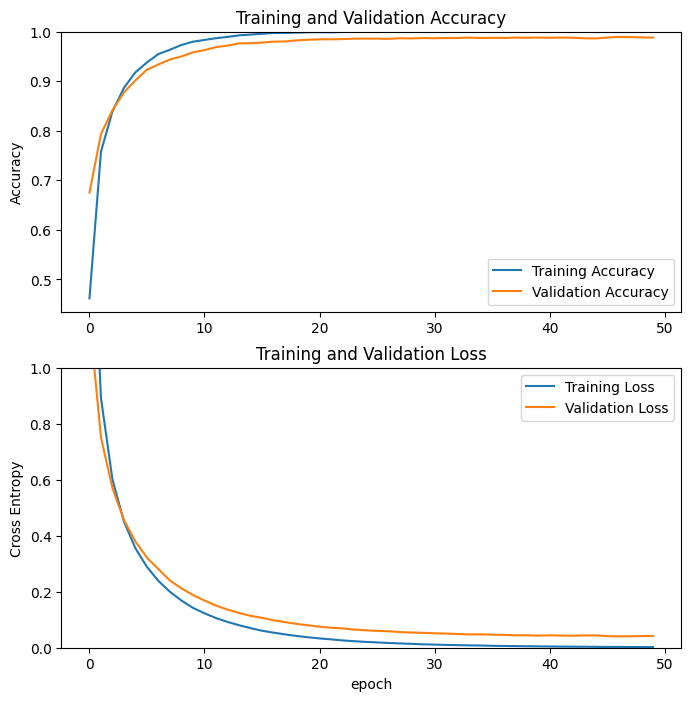

In [38]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### save model

In [45]:
hist.model.save('model_jadi2.h5')

In [40]:
#load model yang udah di save
from keras.models import load_model
import tensorflow as tf
model_gym=load_model('model_jadi.h5')

### ini buat convertnya pake yang default aja

In [41]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_gym)
tflite_model = converter.convert()
with open('model_jadi.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpmbs966f6\assets


In [54]:
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224,224))
test_data = test_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./127.5, offset=-1)(x), y))

Found 1154 files belonging to 13 classes.


In [53]:
# tes model ke data test
loss, accuracy = hist.model.evaluate(test_data)
print('Test accuracy :', accuracy)

19/19 [==============================] - 4s 132ms/step - loss: 5.5467 - accuracy: 0.1104
Test accuracy : 0.11036789417266846


### Buat tes model.h5 nya

Found 1154 files belonging to 13 classes.
Predictions:
 [ 6  0 11 12  7  0  2  4  7  9  6  9  9  0  3  2  4 10  9  9  7  0  9 10
  7 10  2  4  3  2  2  9]
Labels:
 [ 6  0 11 12  7  0  2  4  7  9  6  9  9  0  3  2  4 10  9  9  7  0  6 10
  7 10  2  4  3  2  2  9]


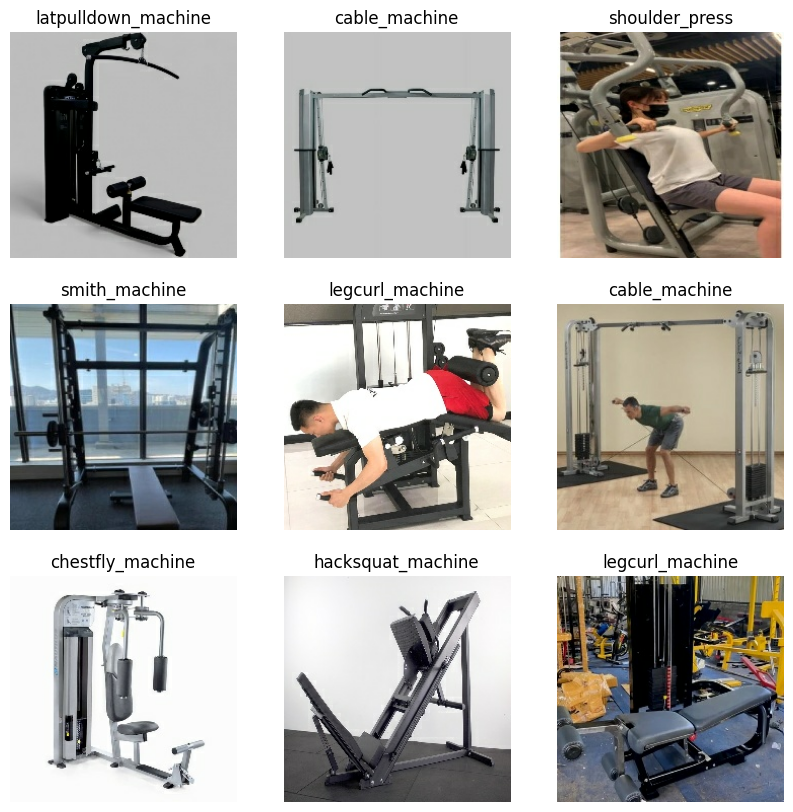

In [49]:
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224,224))

# Retrieve a batch of images from the test set
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model_gym.predict_on_batch(image_batch)

# Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1)

print('Predictions:\n', predicted_classes.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predicted_classes[i]])
  plt.axis("off")


### tes predict model tflite nya

Found 1154 files belonging to 13 classes.
Predicted class: chestfly_machine
True class: chestfly_machine


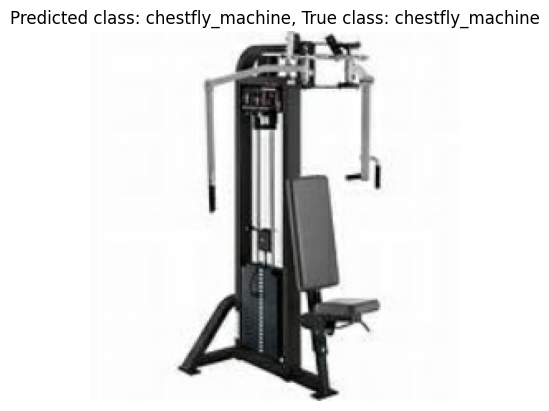

In [58]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model_jadi.tflite")
interpreter.allocate_tensors()

# Prepare test data
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224, 224))

# Retrieve a batch of images and labels from the test set
for images, labels in test_data:
    break

# Take only one image from the batch
image = images[0]

# Set input tensor
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image, axis=0))

# Run inference
interpreter.invoke()

# Get output tensor
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert output tensor to predicted class
predicted_class = np.argmax(output_data)

# Convert predicted class back to string label
predicted_label = test_data.class_names[predicted_class]

# Print prediction and true label
print('Predicted class:', predicted_label)
print('True class:', test_data.class_names[labels[0]])

# Plot image with predicted class
plt.imshow(image.numpy().astype("uint8"))
plt.title('Predicted class: ' + predicted_label + ', True class: ' + test_data.class_names[labels[0]])
plt.axis("off")
plt.show()


Found 1154 files belonging to 13 classes.
Predicted class: chestfly_machine
True class: elliptical_trainer


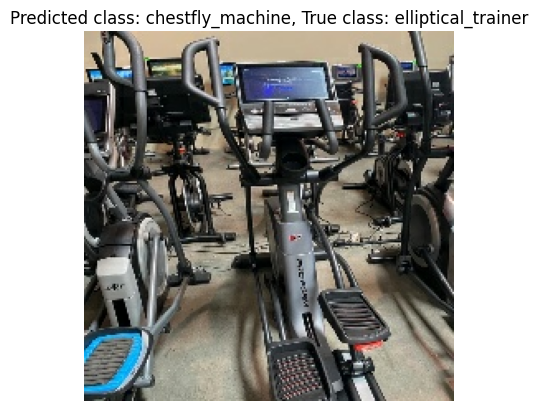

In [94]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Prepare test data
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224, 224))

# Retrieve a batch of images and labels from the test set
for images, labels in test_data:
    break

# Take only one image from the batch
image = images[0]

# Set input tensor
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image, axis=0))

# Run inference
interpreter.invoke()

# Get output tensor
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert output tensor to predicted class
predicted_class = np.argmax(output_data)

# Convert predicted class back to string label
predicted_label = test_data.class_names[predicted_class]

# Print prediction and true label
print('Predicted class:', predicted_label)
print('True class:', test_data.class_names[labels[0]])

# Plot image with predicted class
plt.imshow(image.numpy().astype("uint8"))
plt.title('Predicted class: ' + predicted_label + ', True class: ' + test_data.class_names[labels[0]])
plt.axis("off")
plt.show()


In [92]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Function to load and preprocess image
def load_and_preprocess_image(image_path, input_shape):
    image = Image.open(image_path).convert('RGB')
    image = image.resize((input_shape[1], input_shape[2]))
    image = np.array(image, dtype=np.float32)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Prepare the input image
# image_path = 'D:/bangkit/mobilenet-tes/tess/a.PNG'
image_path = 'lat2.jpg'
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
input_data = load_and_preprocess_image(image_path, input_shape)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)
    
# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert output tensor to predicted class
predicted_class = np.argmax(output_data)

# Assuming you have the class names in the same order as the model output classes

# Convert predicted class back to string label
predicted_label = class_names[predicted_class]

# Print prediction
print('Predicted class:', predicted_label)

# Load the image for display
image = Image.open(image_path)

# Plot image with predicted class
plt.imshow(image)
plt.title('Predicted class: ' + predicted_label)
plt.axis("off")
plt.show()


ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 4 for input 0.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(120, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), padding='valid', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model = keras.models.Sequential([
    keras.Input(shape=(160, 160, 3)),
    keras.layers.Resizing(224,224),
    #keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='sigmoid')
])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

In [ ]:
model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

In [ ]:
# Loading base model dari pre-trained model MobileNet V2

IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

MobileNetV2.trainable = False

In [ ]:
# mendefinisikan modelKu
# -1, 1
# 0-255
## 255/127.5 == 0-2
## -1 - 1

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = MobileNetV2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

modelKu = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
modelKu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [55]:
# coba performansi model pada validation_dataset sebelum dilakukan proses training

loss0, accuracy0 = model.evaluate(validation_dataset)

72/72 [==============================] - 8s 99ms/step - loss: 0.0419 - accuracy: 0.9882


In [17]:
# Lakukan proses training

initial_epochs = 50
history = modelKu.fit(train_dataset, epochs=initial_epochs, validation_data=validation_dataset)

NameError: name 'modelKu' is not defined

Berikut ini adalah langkah untuk training juga sebagian dari Mobilenet V2

In [19]:
base_model.trainable = True

In [21]:
print("Jumlah layer pada base model: ", len(base_model.layers))

Jumlah layer pada base model:  154


In [23]:
# jika kita ingin untuk train ulang layer 100 ke atas, 
# sedangkan layer awal sampai layer 100 tidak ditrain ulang

for layer in base_model.layers[:54]:
  layer.trainable = False

In [26]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [30]:
fine_tune_epochs = 50
total_epochs =  100 + fine_tune_epochs

model_fine = model.fit(train_dataset, epochs=total_epochs, initial_epoch=100, validation_data=validation_dataset)

Epoch 101/150
148/148 [==============================] - 38s 161ms/step - loss: 1.3643 - accuracy: 0.7682 - val_loss: 86.1743 - val_accuracy: 0.2034
Epoch 102/150
148/148 [==============================] - 22s 145ms/step - loss: 0.1716 - accuracy: 0.9442 - val_loss: 73.4946 - val_accuracy: 0.2237
Epoch 103/150
148/148 [==============================] - 20s 131ms/step - loss: 0.1437 - accuracy: 0.9542 - val_loss: 86.8303 - val_accuracy: 0.2322
Epoch 104/150
148/148 [==============================] - 20s 133ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 29.6337 - val_accuracy: 0.3695
Epoch 105/150
148/148 [==============================] - 20s 131ms/step - loss: 0.0531 - accuracy: 0.9846 - val_loss: 16.9965 - val_accuracy: 0.4271
Epoch 106/150
148/148 [==============================] - 20s 137ms/step - loss: 0.0851 - accuracy: 0.9757 - val_loss: 7.7862 - val_accuracy: 0.6000
Epoch 107/150
148/148 [==============================] - 20s 136ms/step - loss: 0.0691 - accuracy: 0.9787 -

: 

## Mulai dari sini ke bawa sisanya kode nyampah buat coba coba

In [43]:
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes6/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224,224))
test_data = test_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./127.5, offset=-1)(x), y))

Found 1154 files belonging to 13 classes.


In [36]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder ke label
label_encoder.fit(class_names)

# Melakukan encoding pada label
encoded_labels = label_encoder.transform(class_names)

# Lakukan prediksi atau evaluasi model
predicted_labels = model.model.predict(test_data)

# Menggunakan argmax untuk mendapatkan label dengan nilai probabilitas tertinggi
predicted_labels_argmax = np.argmax(predicted_labels, axis=1)

# Kembalikan label asli dari kode yang telah diencode
original_labels = label_encoder.inverse_transform(predicted_labels_argmax)

for i, pred_label in enumerate(predicted_labels):
    print("Sample", i+1, "predicted label:", pred_label)

Sample 1 predicted label: [1.2257019e-09 4.1391718e-04 9.1962988e-09 1.4301913e-06 9.9958462e-01
 7.0400907e-10]
Sample 2 predicted label: [6.83619555e-06 2.30509272e-06 3.71559690e-05 2.74185226e-07
 1.03227176e-04 9.99850154e-01]
Sample 3 predicted label: [1.0131207e-06 5.6632962e-05 1.9548353e-04 9.9601573e-01 3.7146991e-03
 1.6379394e-05]
Sample 4 predicted label: [5.3511908e-08 5.5558053e-06 5.9068238e-08 5.1565877e-07 9.9999309e-01
 7.7245096e-07]
Sample 5 predicted label: [1.1810232e-07 4.6225682e-06 7.8636155e-09 1.5315689e-09 9.9999523e-01
 2.0835405e-08]
Sample 6 predicted label: [2.6181807e-13 2.3627474e-15 2.7266764e-09 2.9290928e-13 1.5019676e-16
 1.0000000e+00]
Sample 7 predicted label: [9.9999154e-01 4.6091461e-08 4.6059996e-12 6.2082584e-09 8.4394114e-06
 2.4679487e-09]
Sample 8 predicted label: [1.72616749e-12 1.18674504e-09 7.22807023e-11 1.06022924e-07
 9.99999881e-01 2.84500461e-11]
Sample 9 predicted label: [3.8360075e-09 3.2693136e-11 1.6452528e-08 4.0201469e-09 1

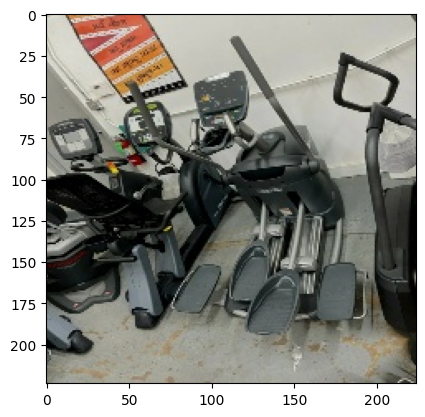

In [24]:
gbr_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test/elliptical_trainer/aug9-el17.jpg"
gbr = Image.open(gbr_dir)
gbr = gbr.convert('RGB')
gbr = gbr.resize((224,224))
gbr = asarray(gbr)

plt.imshow(gbr)

In [25]:
gbr=np.expand_dims(gbr, axis=0)

In [28]:
prediksi=model.model(gbr)

In [29]:
p=np.round(prediksi)

In [30]:
p

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)



---
# Bagian berikut ini hanya untuk menampilkan data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


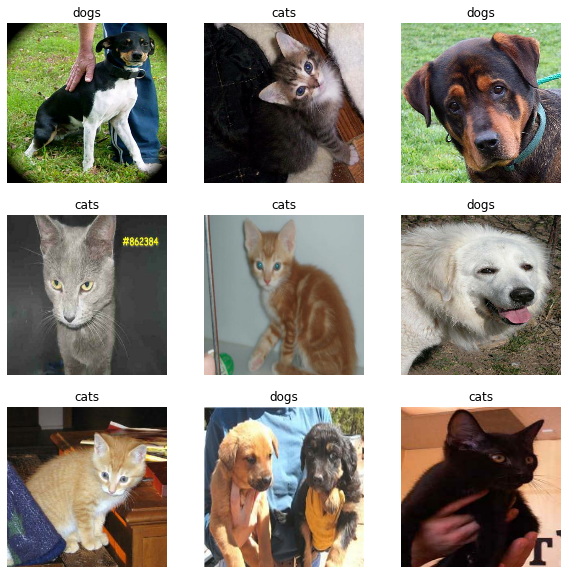

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(3):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

0

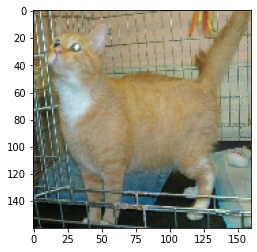

In [ ]:
class_names = train_dataset.class_names

for images, labels in train_dataset.take(3):  # only take first element of dataset
    images = images.numpy()
    labels = labels.numpy()

plt.imshow(images[0].astype("uint8"))
labels[0]
class_names[labels[0]]

In [ ]:
images.shape

(32, 160, 160, 3)

In [37]:
print('Number of training batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
#print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of training batches: 148
Number of validation batches: 19


FINE TUNING

In [14]:
len(model.trainable_variables)

4

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

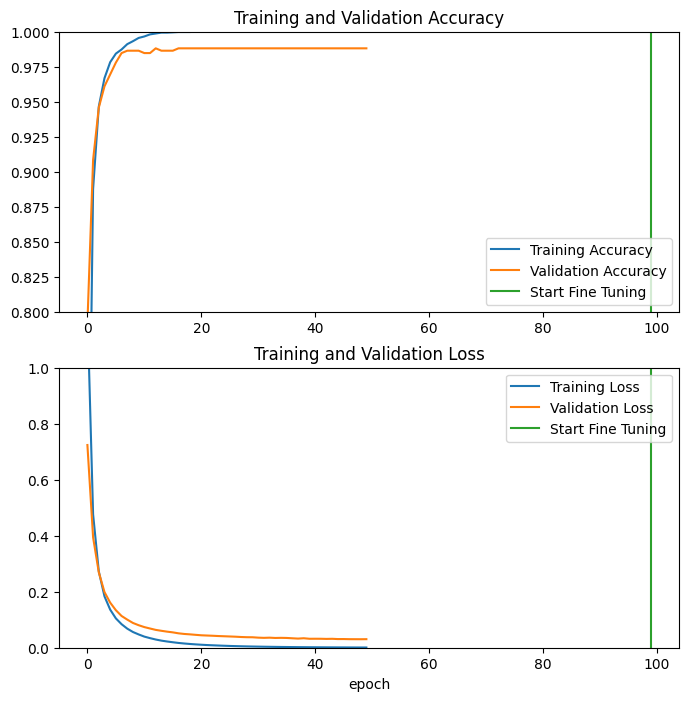

In [57]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([100-1,100-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([100-1,100-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [14]:
loss, accuracy = model_gym.evaluate(test_data)
print('Test accuracy :', accuracy)

19/19 [==============================] - 4s 112ms/step - loss: 0.0292 - accuracy: 0.9900
Test accuracy : 0.9899665713310242


Predictions:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]
Labels:
 [2 2 4 4 2 2 3 3 2 3 1 5 4 2 3 0 3 5 3 0 0 1 2 0 4 0 1 2 1 0 5 1]


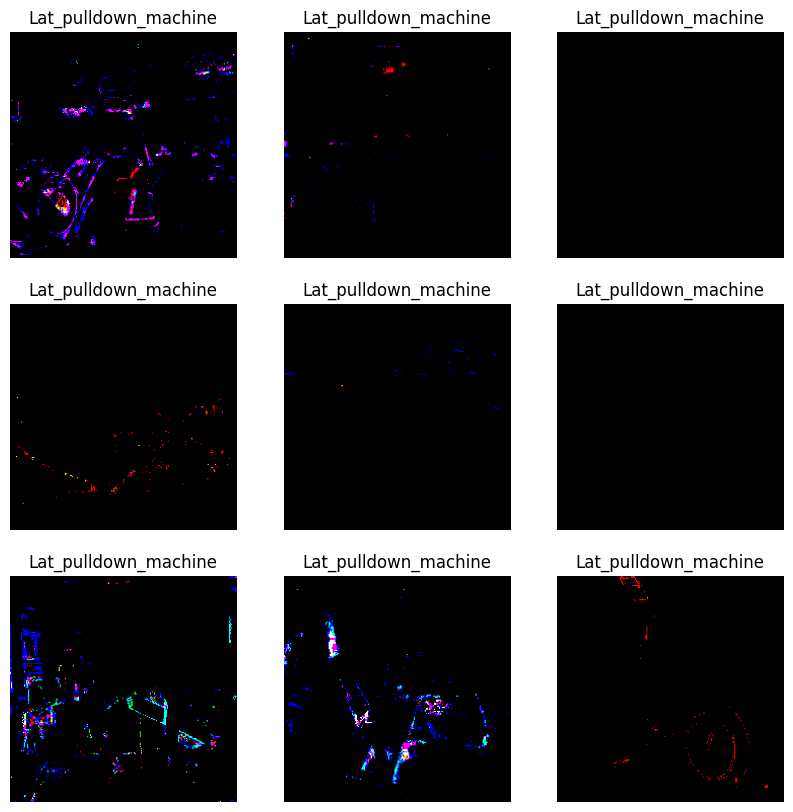

In [17]:
# # Retrieve a batch of images from the test set
# image_batch, label_batch = test_data.as_numpy_iterator().next()
# predictions = model.predict_on_batch(image_batch).flatten()

# # Apply a sigmoid since our model returns logits
# predictions = tf.nn.softmax(predictions)
# predictions = tf.where(predictions < 0.5, 0, 1)

# print('Predictions:\n', predictions.numpy())
# print('Labels:\n', label_batch)

# plt.figure(figsize=(10, 10))
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   plt.imshow(image_batch[i].astype("uint8"))
#   plt.title(class_names[predictions[i]])
#   plt.axis("off")

Found 598 files belonging to 6 classes.
Predictions:
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Labels:
 [4 1 0 3 0 1 1 2 4 3 1 2 1 3 5 2 2 5 5 2 3 5 4 5 3 4 1 0 2 1 4 4]


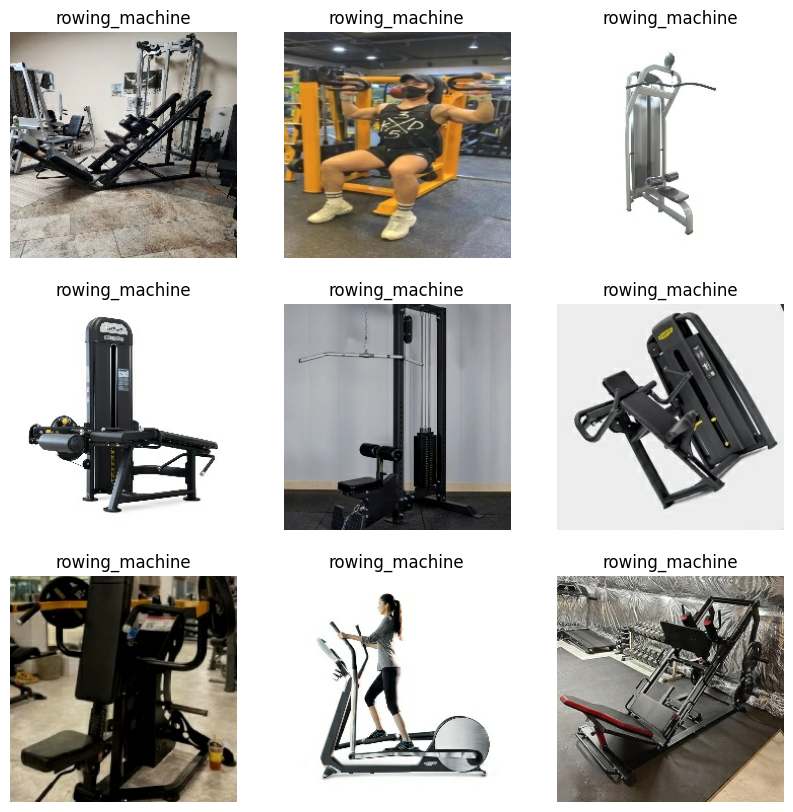

In [16]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess image batch
def preprocess_image_batch(image_batch):
    image_batch = image_batch.astype(np.float32)
    image_batch = (image_batch / 127.5) - 1  # Rescale image to [-1, 1]
    return image_batch

# Load test data
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224,224))

# Retrieve a batch of images from the test set
image_batch, label_batch = test_data.as_numpy_iterator().next()

# Preprocess the image batch
image_batch = preprocess_image_batch(image_batch)

# Run inference
interpreter.set_tensor(input_details[0]['index'], image_batch)
interpreter.invoke()
predictions = interpreter.get_tensor(output_details[0]['index'])

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

print('Predictions:\n', predicted_classes)
print('Labels:\n', label_batch.numpy())

# Display images with predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((image_batch[i] + 1) * 127.5 / 255.0)  # Convert back to original image scale
    plt.title(class_names[predicted_classes[i]])
    plt.axis("off")
plt.show()


Found 598 files belonging to 6 classes.
Prediction: 5
Label: 5


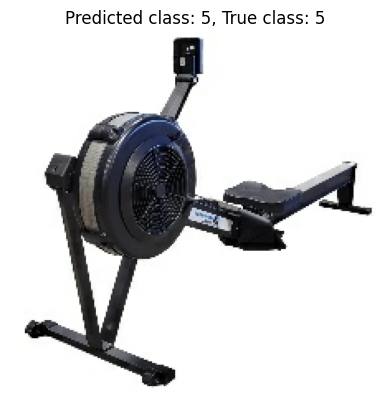

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Prepare test data
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224, 224))

# Retrieve a batch of images and labels from the test set
for images, labels in test_data:
    break

# Take only one image from the batch
image = images[0]

# Set input tensor
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image, axis=0))

# Run inference
interpreter.invoke()

# Get output tensor
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert output tensor to predicted class
predicted_class = np.argmax(output_data)

# Print prediction and true label
print('Prediction:', predicted_class)
print('Label:', labels[0].numpy())

# Plot image with predicted class
plt.imshow(image.numpy().astype("uint8"))
plt.title('Predicted class: ' + str(predicted_class) + ', True class: ' + str(labels[0].numpy()))
plt.axis("off")
plt.show()


Found 598 files belonging to 6 classes.
Predicted class: rowing_machine
True class: 5


TypeError: can only concatenate str (not "list") to str

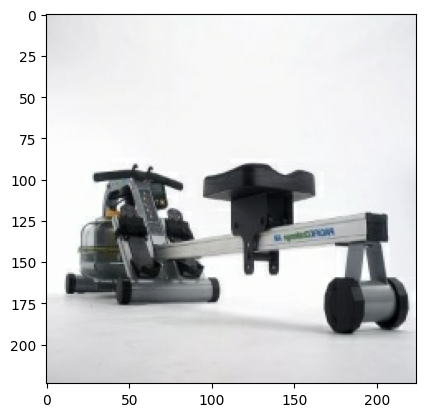

In [40]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

# Prepare test data
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test"
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, shuffle=True, batch_size=32, image_size=(224, 224))

# Retrieve a batch of images and labels from the test set
for images, labels in test_data:
    break

# Create a dictionary mapping string labels to integers
label_dict = {label: i for i, label in enumerate(test_data.class_names)}

# Convert string labels to integer labels
labels_int = []
for label in labels.numpy():
    if label in label_dict:
        labels_int.append(label_dict[label])
    else:
        # Handle the case where label is not found in the dictionary
        # For example, you can assign a default value or skip the label
        # In this example, we skip the label
        pass

labels_int = np.array(labels_int)

# Take only one image from the batch
image = images[0]

# Set input tensor
input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], np.expand_dims(image, axis=0))

# Run inference
interpreter.invoke()

# Get output tensor
output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Convert output tensor to predicted class
predicted_class = np.argmax(output_data)

# Convert predicted class back to string label
predicted_label = test_data.class_names[predicted_class]

# Print prediction and true label
print('Predicted class:', predicted_label)
print('True class:', labels[0].numpy())

# Plot image with predicted class
plt.imshow(image.numpy().astype("uint8"))
plt.title('Predicted class: ' + predicted_label + ', True class: ' + str(labels[0].numpy()))
plt.axis("off")
plt.show()


In [46]:
import tensorflow as tf

# Definisikan direktori dataset
test_dir = "D:/bangkit/mobilenet-tes/dataset_tes3/test/"

# Buat dataset dari direktori
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,  # Nonaktifkan pengacakan agar label tetap berurutan
    batch_size=32,
    image_size=(224, 224)
)

# Ambil contoh batch pertama dari dataset
for images, labels in test_data.take(1):
    break

# Cetak label dari batch pertama
print("Labels:", labels.numpy())


Found 598 files belonging to 6 classes.
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [53]:
print(class_names)

['Lat_pulldown_machine', 'Shoulder_press', 'elliptical_trainer', 'leg_curl_machine', 'legpress_machine', 'rowing_machine']
